# Modes of *ecco_access*

Andrew Delman, 2024-10-10

[Introduction](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#Introduction)

[Query-only modes](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#Query-only-modes)\
[*ls*/*query* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#ls/query-mode)\
[*s3_ls*/*s3_query* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#s3_ls/s3_query-mode)

[Direct download modes](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#Direct-download-modes)\
[*download* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#download-mode)\
[*download_ifspace* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#download_ifspace-mode)\
[*download_subset* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#download_subset-mode)

[In-cloud only access modes](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#In-cloud-only-access-modes)\
[*s3_open* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#s3_open-mode)\
[*s3_open_fsspec* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#s3_open_fsspec-mode)\
[*s3_get* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#s3_get-mode)\
[*s3_get_ifspace* mode](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#s3_get_ifspace-mode)

[Time comparison of access modes](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_modes.html#Time-comparison-of-access-modes)


## Introduction

In the [previous tutorial](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_access_intro.html) the **ecco_access** library was introduced, with a few examples of how it can be used to search and access ECCOv4 output available from PO.DAAC. This tutorial summarizes and compares the various modes that **ecco_access** supports for HTTPS and (in-cloud) S3 data access. We'll use each mode to search/download/retrieve native grid monthly SSH and wind stress datasets for 6 months (Jan-Jun 2010).

As the [time comparison](#time-comparison-of-access-modes) at the end will show, mode = `s3_open_fsspec` is typically fastest when working in the cloud and you have the necessary JSON files available.

In [1]:
import numpy as np
import xarray as xr
from os.path import join,expanduser

import ecco_access as ea

SSH_shortname = 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4'
windstr_shortname = 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4'

## Query-only modes

These modes return the URLs (`ls`/`query`) or S3 file paths (`s3_ls`/`s3_query`) to access the ECCO output. These modes only work with `ecco_podaac_access` (not `ecco_podaac_to_xrdataset`), since we are not opening a dataset, just querying the location of the data.


> The `ls` and `query` modes are interchangeable and have the same functionality, just by different names. The same is true for `s3_ls` and `s3_query`.


### `ls`/`query` mode

In [2]:
urls_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='ls')

In [3]:
urls_dict[SSH_shortname]

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFAC

In [4]:
urls_dict[windstr_shortname]

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4/OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-

### `s3_ls`/`s3_query` mode

You can use the `s3_ls`/`s3_query` mode to find the `S3` bucket file paths for AWS in-cloud access:

In [5]:
s3_paths_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_query')

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}
{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}


In [6]:
s3_paths_dict

{'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4': ['s3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
  's3://podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc'],
 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4': ['s3://podaac-ops-cumulus-protected/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4

The dictionary returned has the locations of each of the queried files on `S3`. Note that to read the data, the files need to be opened, e.g. using [s3fs](https://s3fs.readthedocs.io/en/latest/#examples) and NASA Earthdata authentication.

In [7]:
# log in to NASA Earthdata
# (will prompt for credentials if they are not already in ~/.netrc)
ea.setup_earthdata_login_auth()

import requests
import s3fs

# obtain NASA Earthdata credentials for in-cloud S3 access
creds = requests.get('https://archive.podaac.earthdata.nasa.gov/s3credentials').json()
s3 = s3fs.S3FileSystem(anon=False,
                       key=creds['accessKeyId'],
                       secret=creds['secretAccessKey'],
                       token=creds['sessionToken'])

# use list comprehension to open files 
# and create list that can be passed to xarray file opener
open_SSH_files = [s3.open(file) for file in s3_paths_dict[SSH_shortname]]

# open xarray dataset
ds_SSH_curr = xr.open_mfdataset(open_SSH_files,\
                                compat='override',data_vars='minimal',coords='minimal',\
                                parallel=True)

In [8]:
ds_SSH_curr

<xarray.Dataset> Size: 15MB
Dimensions:    (time: 6, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 48B 2010-01-16T12:00:00 ... 2010-06-16
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 96B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    SSH        (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHIBC     (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHNOIBC   (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    ETAN       (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2010-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2010-01-01T00:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         9ce7afa6-400c-11eb-ab45-0cc47a3f49c3

## Direct download modes

### `download` mode

The `download` mode directly downloads the queried files under a root directory of your choosing, creating the directory if needed. If `ecco_podaac_access` is called using this mode, the dictionary returned includes list(s) of the downloaded files that can be passed to `xarray.open_mfdataset` (or `xarray.open_dataset`, one file at a time). If `ecco_podaac_to_xrdataset` is used, the `xarray.open_mfdataset` step is included and an `xarray` Dataset is returned.

In [9]:
files_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='download',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:02<00:00,  2.28it/s]

total downloaded: 35.5 Mb
avg download speed: 13.44 Mb/s
Time spent = 2.6406123638153076 seconds


created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:02<00:00,  2.46it/s]

total downloaded: 35.79 Mb
avg download speed: 14.6 Mb/s
Time spent = 2.451402187347412 seconds




In [10]:
files_dict

{'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4': ['/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
  '/home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc'],
 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4': ['/home/jovyan/Downloads/ECCO_V4r4_PODA

Or if `ecco_podaac_to_xrdataset` is used (we'll time how long this takes so it can be compared to other access modes):

In [11]:
import os

# remove files just downloaded
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

In [12]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='download',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:01<00:00,  3.21it/s]

total downloaded: 35.5 Mb
avg download speed: 18.89 Mb/s
Time spent = 1.878847599029541 seconds


created download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4
DL Progress: 100%|###########################| 6/6 [00:02<00:00,  2.49it/s]

total downloaded: 35.79 Mb
avg download speed: 14.78 Mb/s
Time spent = 2.422295331954956 seconds


CPU times: user 929 ms, sys: 793 ms, total: 1.72 s
Wall time: 5.52 s


Since multiple datasets were queried, the results of `ecco_podaac_to_xrdataset` are returned in the form of a dictionary. The contents of the wind stress dataset can be seen here:

In [13]:
ds_dict[windstr_shortname]

<xarray.Dataset> Size: 15MB
Dimensions:    (time: 6, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 48B 2010-01-16T12:00:00 ... 2010-06-16
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 96B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    EXFtaux    (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    EXFtauy    (time, tile, j, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, tile, j, i_g) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceTAUY    (time, tile, j_g, i) float32 3MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2010-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2010-01-01T00:00:00
    title:                        ECCO Ocean and Sea-Ice Surface Stress - Mon...
    uuid:                         b48fa40a-400d-11eb-9063-0cc47a3f49c3

### `download_ifspace` mode

This mode is similar to `download`, but it will also query how much storage is available at the target download location before carrying out downloads, and returns an error if the space to be occupied by the downloaded files is more than a specified fraction of available storage. The function also takes into account if some or all of the queried files are already on disk, and therefore do not need to be downloaded again.

In [14]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='download_ifspace',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'))

Size of files to be downloaded to instance is 0.0 GB,
which is 0.0% of the 4.538 GB available storage.
Proceeding with file downloads via NASA Earthdata URLs

SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|########################| 6/6 [00:00<00:00, 71902.35it/s]

total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s
Time spen

Notice that the size of files to be downloaded was zero, since all of these files were already on disk at the specified location.

In [15]:
# remove downloaded files
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

### `download_subset` mode

The `download_subset` mode is essentially a wrapper for the `ecco_podaac_download_subset` function, which uses Opendap to allow spatial, temporal, and variable-based subsetting of ECCO datasets and granules at the download stage. Depending on the size of the source dataset (e.g., whether the dataset has a depth dimension or not), this mode may be faster or slower than downloading the full granule files; it will almost certainly be slower than using mode = `s3_open_fsspec` when you have the `json` files available. But it can be a space- and time-saver when you are working on your local machine and not in the cloud.

Multiple examples of the `ecco_podaac_download_subset` functionality are provided in the [Downloading Subsets of ECCO Datasets](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_subsets_tutorial.html) tutorial. Here is one example using `ecco_podaac_to_xrdataset` to open one year of monthly SST using mode = `download_subset` (in the ECCOv4r4 output, SST is the top depth layer of `THETA`):

In [16]:
ds_SST_2015 = ea.ecco_podaac_to_xrdataset('ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4',\
                                            StartDate='2015-01',EndDate='2015-12',\
                                            mode='download_subset',\
                                            download_root_dir=join(user_home_dir,'Downloads',\
                                                                   'ECCO_V4r4_PODAAC','SST_global'),\
                                            vars_to_include=['THETA'],\
                                            k_isel=[0,1,1])

Creating download directory /home/jovyan/Downloads/ECCO_V4r4_PODAAC/SST_global/ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4

Please wait while program searches for the granules ...


Total number of matching granules: 12
DL Progress: 100%|#########################| 12/12 [00:31<00:00,  2.61s/it]

total downloaded: 16.73 Mb
avg download speed: 0.53 Mb/s
Time spent = 31.296209812164307 seconds




In [17]:
ds_SST_2015

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 12, k: 1, tile: 13, j: 90, i: 90, j_g: 90, i_g: 90,
                k_p1: 2, k_l: 1, nb: 4, k_u: 1, nv: 2)
Coordinates: (12/24)
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Zp1        (k_p1) float32 8B dask.array<chunksize=(2,), meta=np.ndarray>
    Zl         (k_l) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
  * k_p1       (k_p1) int32 8B 0 1
  * k_u        (k_u) int32 4B 0
  * nb         (nb) float32 16B 0.0 1.0 2.0 3.0
  * nv         (nv) float32 8B 0.0 1.0
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2015-01-16T12:00:00 ... 2015-12-16T1...
Data variables:
    THETA      (time, k, tile, j, i) float32 5MB dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_end:               2015-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             2015-01-01T00:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            f4cfd0f6-4181-11eb-9946-0cc47a3f4815
    history_json:                    [{"$schema":"https:\/\/harmony.earthdata...

Now plot tile 11 of SST during Dec 2015:

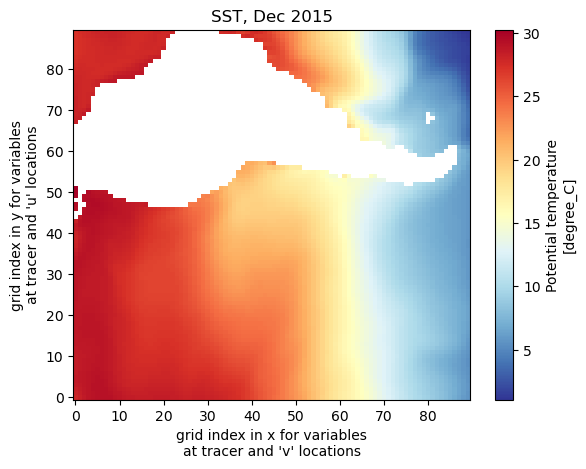

In [18]:
ds_SST_2015.THETA.isel(time=11,k=0,tile=11).plot(cmap='RdYlBu_r')
plt.title('SST, Dec 2015')
plt.show()

## In-cloud only access modes

### `s3_open` mode

If you are working in the AWS cloud (in region `us-west-2`), you can open files from `S3` storage without downloading them; this is called "direct access".

In [19]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_open')

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
CPU times: user 3.01 s, sys: 1.05 s, total: 4.06 s
Wall time: 14.1 s


### `s3_open_fsspec` mode

The `s3_open` mode allows you to access data "remotely" from `S3`, but it is usually slower than downloading the data. However, the [fsspec](https://filesystem-spec.readthedocs.io/en/latest/) and [kerchunk](https://fsspec.github.io/kerchunk/) libraries provide an [efficient way to access data](https://medium.com/pangeo/fake-it-until-you-make-it-reading-goes-netcdf4-data-on-aws-s3-as-zarr-for-rapid-data-access-61e33f8fe685) by storing pointers to data chunks in `json` files. These files have been produced for the ECCO datasets, and by using mode = `s3_open_fsspec` we can access the data much more quickly without downloading it! 

> Note: In order for this mode to work you need the fsspec/kerchunk generated `json` files. Specify the root directory where these files can be found using `jsons_root_dir=join('/efs_ecco','mzz-jsons')` to use this mode.

In [20]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_open_fsspec',\
                                        jsons_root_dir=join('/efs_ecco','mzz-jsons'))

CPU times: user 77.7 ms, sys: 4.97 ms, total: 82.6 ms
Wall time: 3.34 s


In [21]:
ds = xr.merge(list(ds_dict.values()))
ds

<xarray.Dataset> Size: 25MB
Dimensions:    (time: 6, tile: 13, j: 90, i: 90, nb: 4, j_g: 90, i_g: 90, nv: 2)
Coordinates: (12/13)
    XC         (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds    (tile, j, i, nb) float32 2MB -115.0 -115.0 ... -115.0 -108.5
    XG         (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC         (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds    (tile, j, i, nb) float32 2MB -88.18 -88.32 ... -88.18 -88.16
    YG         (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...         ...
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 48B 2010-01-16T12:00:00 ... 2010-06-16
    time_bnds  (time, nv) datetime64[ns] 96B 2010-01-01 ... 2010-07-01
Dimensions without coordinates: nb, nv
Data variables:
    ETAN       (time, tile, j, i) float32 3MB ...
    SSH        (time, tile, j, i) float32 3MB ...
    SSHIBC     (time, tile, j, i) float32 3MB ...
    SSHNOIBC   (time, tile, j, i) float32 3MB ...
    EXFtaux    (time, tile, j, i) float32 3MB ...
    EXFtauy    (time, tile, j, i) float32 3MB ...
    oceTAUX    (time, tile, j, i_g) float32 3MB ...
    oceTAUY    (time, tile, j_g, i) float32 3MB ...
Attributes: (12/57)
    Conventions:                  CF-1.8, ACDD-1.3
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            1992-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea Surface Height - Monthly Mean llc9...
    uuid:                         9302811e-400c-11eb-b69e-0cc47a3f49c3

### `s3_get` mode

The `s3_get` mode functions much like the `download` mode, except files are accesed in-cloud and downloading them to your local instance. If used with `ecco_podaac_access`, a dictionary containing the file paths/names is returned, that can then be used to open an `xarray` Dataset.

In [22]:
files_dict = ea.ecco_podaac_access([SSH_shortname,windstr_shortname],\
                                    StartDate='2010-01',EndDate='2010-06',\
                                    mode='s3_get',\
                                    download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC_S3'))
files_dict[SSH_shortname]

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc

Time spent = 0.44377636909484863 seconds


{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-03_ECCO_V4r4

['/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc',
 '/home/jovyan/Downloads/ECCO_V4r4_PODAAC_S3/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4/SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc']

In [23]:
# remove downloaded files
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

Now use the mode with `ecco_podaac_to_xrdataset`:

In [24]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_get',\
                                        download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC_S3'))

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-03_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-04_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-05_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_mon_mean_2010-06_ECCO_V4r4_native_llc0090.nc

Time spent = 0.43352532386779785 seconds


{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}

Total number of matching granules: 6
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-01_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-02_ECCO_V4r4_native_llc0090.nc
downloading OCEAN_AND_ICE_SURFACE_STRESS_mon_mean_2010-03_ECCO_V4r4

In [25]:
# remove downloaded files
for shortname,files_list in files_dict.items():
    for file in files_list:
        os.remove(file)

### `s3_get_ifspace` mode

This mode is similar to `s3_get`, but it will also query how much storage is available at the target download location before carrying out downloads. If the space to be occupied by the downloaded files is more than a specified fraction of available storage, the files are opened remotely (using `s3_open`), rather than using `s3_get`.

In [26]:
%%time

ds_dict = ea.ecco_podaac_to_xrdataset([SSH_shortname,windstr_shortname],\
                                        StartDate='2010-01',EndDate='2010-06',\
                                        mode='s3_get_ifspace',\
                                        download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC_S3'),\
                                        max_avail_frac=0.01)

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}
{'ShortName': 'ECCO_L4_STRESS_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2010-01-02,2010-06-30'}
Size of files to be downloaded to instance is 0.066 GB,
which is 1.47% of the 4.5040000000000004 GB available storage.
Download size is larger than specified fraction of available storage.
Generating file lists to open directly from S3.
CPU times: user 3.15 s, sys: 861 ms, total: 4.01 s
Wall time: 12.3 s


Notice that the files were opened remotely on `S3` rather than downloaded, but only because `max_avail_frac` was set very low (0.01 or 1% of available storage). If `max_avail_frac` was set to its default value of 0.5 (50% of available storage), the files would have been downloaded.

## Time comparison of access modes

Based on the examples above, here are some wall times for generating `ds_dict` using different modes, on a `large` instance in the AWS Cloud:

- `download`: 5.52 s

- `download_ifspace`: comparable to `download`

- `s3_open`: 14.1 s

- `s3_open_fsspec`: 3.34 s

- `s3_get`: 4.8 s

- `s3_get_ifspace`: 12.3 s (similar to `s3_open` because files were opened remotely)


These numbers will vary depending on the size and layout of the dataset(s) requested. But the "winning" mode on the AWS Cloud is usually `s3_open_fsspec` if you have access to the necessary JSON files, followed by `s3_get` or `s3_get_ifspace`. Feel free to experiment; changing the access mode is as easy as changing the `mode` parameter in the `ecco_podaac_to_xrdataset` or `ecco_podaac_access` functions!